# Relatório VIII

## Identificando e Removendo Outliers

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(14,6))
import pandas as pd

dados = pd.read_csv('dados/aluguel_residencial_2.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


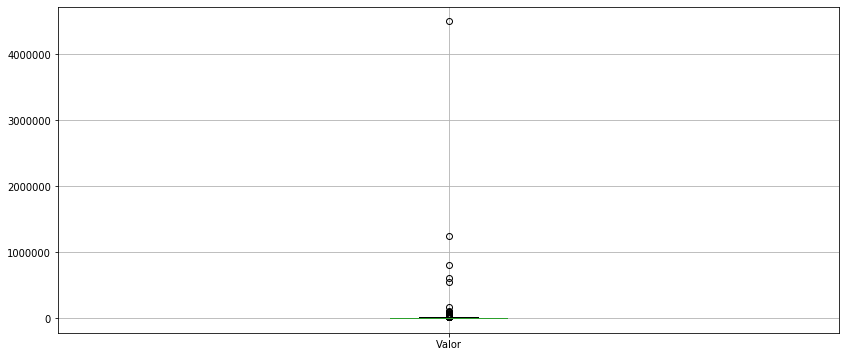

In [4]:
# Plotando boxplot da coluna 'Valor'. Notar que a visualização fica comprometida por conta dos outliers
dados.boxplot(['Valor'])

In [6]:
# Visualizando outliers
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/m²,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [ ]:
# Calculando os parâmetros do boxplot de acordo com a figura abaixo: quartil 1 (Q1), quartil 3 (Q3), intervalo intraquartil 
# (IIQ) e os outliers inferiores e superiores. O quartil 2 (Q2) corresponde à mediana.

<img src="dados/compressed_box-plot.png" width=70%>

In [7]:
valor = dados['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
inf_outliers = Q1 - 1.5*IIQ
sup_outliers = Q3 + 1.5*IIQ

In [8]:
# Removendo os outliers selecionando somente os valores que estão dentro do intervalo definido entre inf_outliers e 
# sup_outliers
selecao = (valor >= inf_outliers) & (valor <= sup_outliers)
new_data = dados[selecao]

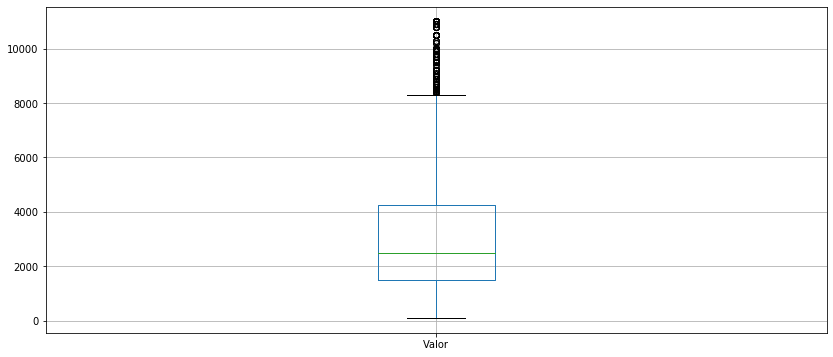

In [9]:
# Gerando novamente o boxplot
new_data.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EAC37DB08>]],
      dtype=object)

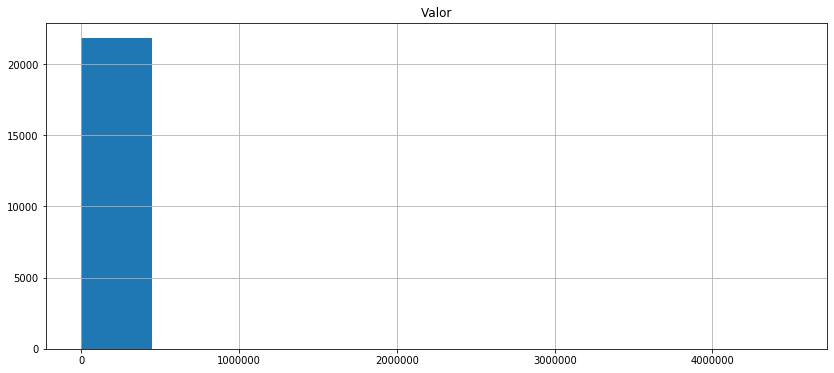

In [10]:
# Plotando histograma antes da remoção dos outliers
dados.hist(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EAC889E08>]],
      dtype=object)

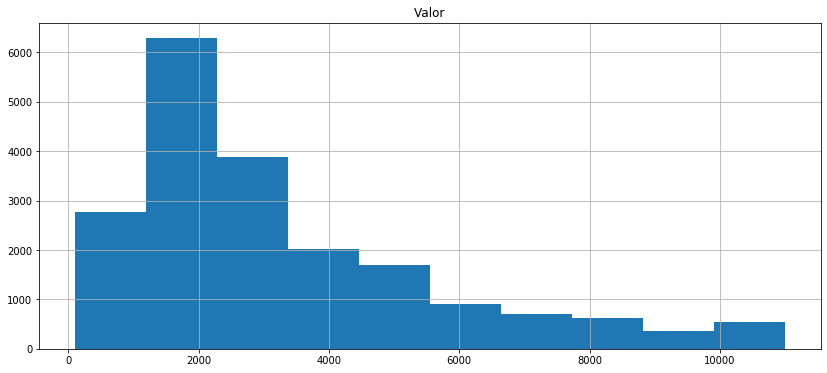

In [11]:
# Plotando histograma após a remoção dos outliers
new_data.hist(['Valor'])

## Exercício - Estatísticas do box plot

In [12]:
# Importando banco de dados do exercício
data = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')

In [15]:
# Calculando os parâmetros do boxplot para a coluna 'Valor m2'
valor_m2 = data['Valor m2']
Q1 = valor_m2.quantile(.25)
Q3 = valor_m2.quantile(.75)
IIQ = Q3 - Q1
inf_outliers = Q1 - 1.5*IIQ
sup_outliers = Q3 + 1.5*IIQ

print('Q1:{}, Q3:{}, IIQ: {}, Limite inferior dos outliers:{}, Limite superior dos outliers:{}'.format(Q1,Q3,IIQ,inf_outliers,sup_outliers))

Q1:21.25, Q3:42.31, IIQ: 21.060000000000002, Limite inferior dos outliers:-10.340000000000003, Limite superior dos outliers:73.9


## Identificando e Removendo Outliers por Grupo

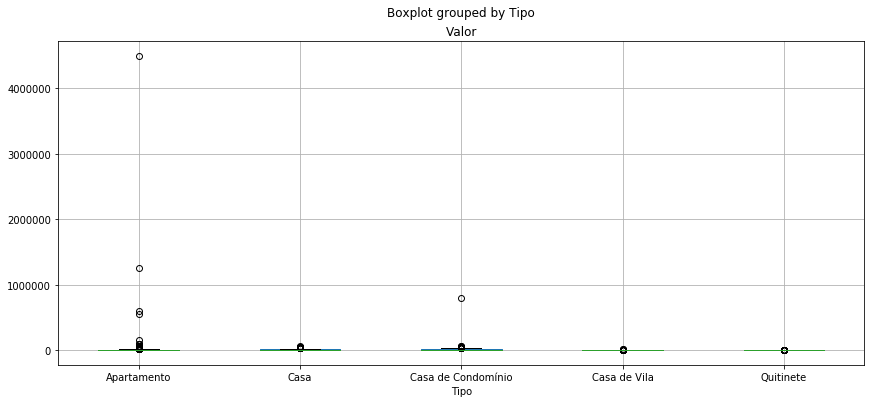

In [16]:
# Plotando boxplots de um grupo
dados.boxplot(['Valor'], by = 'Tipo')

In [17]:
# Criando agrupamento por tipo
grupo_tipo = dados.groupby('Tipo')

In [19]:
# Checando tipo do agrupamento
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

In [20]:
# Criando um novo agrupamento mas em forma de Series
grupo_tipo = dados.groupby('Tipo')['Valor']

In [21]:
# Checando tipo do agrupamento
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [22]:
# Calculando os parâmetros para remoção dos outliers no boxplot
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [23]:
# Ao visualizarmos Q1, por exemplo, teremos uma Series por tipo de imóvel
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [24]:
# Para acessar valores específicos por tipo de imóvel, usa-se a seguinte estrutura
limite_superior['Apartamento']

9950.0

In [25]:
# Criaremos uma seleção mais complexa, afim de identificarmos os dados discrepante de acordo com os tipos de apartamento, 
# coletando as chaves do dicionário.

for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [30]:
# Agora precisaremos realizar uma seleção, e em um caso que temos mais de um tipo de variável, 'Tipo' e 'Valor'.
for tipo in grupo_tipo.groups.keys():
    selecao = (dados['Tipo'] == tipo) & ((dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo]))
    dados[selecao]

In [31]:
# Nós queremos que esse procedimento seja feito com todos os tipos de imóvel, e então concatenar essas informações.
new_data = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    selecao = (dados['Tipo'] == tipo) & ((dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo]))
    dados_selecao = dados[selecao]
    new_data = pd.concat([new_data,dados_selecao])

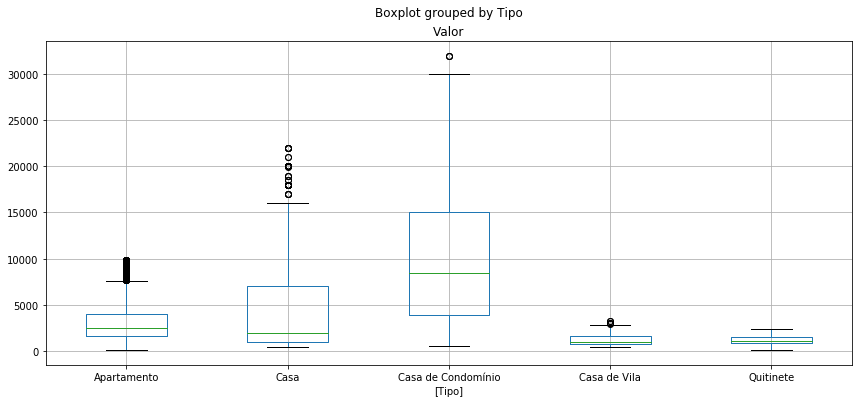

In [33]:
# Plotando o novo boxplot com outliers removidos por tipo de imóvel
new_data.boxplot(['Valor'], by = ['Tipo'])

In [34]:
# Com os dados limpos, precisamos salvá-los para poder utilizá-los em análises posteriores. 
new_data.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index = False)